# lecture060922.py Code given

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from skimage import io
from skimage.color import rgb2gray

In [38]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    #Getting the image  
    #filename = '../Images/'+name
    filename = name
    image = io.imread(filename, as_gray = False) 

    return image
def show_image(image, label ="Image:", size=(6,2), cmap='viridis'):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap=cmap) 
    plt.show()

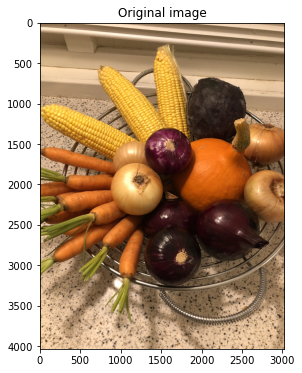

fall.shape (4032, 3024, 3)


In [39]:
#reading image
fall = get_image('../Images/fall.jpeg')

# # display image
show_image(fall, label ="Original image", size=(10,6), cmap='gray')


# shape of image matrix
print("fall.shape", fall.shape)

Max red 255
Min red 3


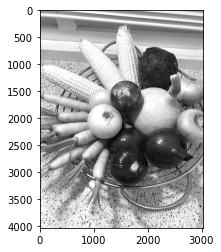

In [40]:
# extracting one colour and finding min and max values
fall_red = fall[:,:,0] # 0=red, 1=green, 2=blue

print("Max red",max(fall_red.flatten()))
print("Min red", min(fall_red.flatten()))

plt.imshow(fall_red, vmin=0, vmax=255,cmap='gray')
plt.show()

#Making a gray image
#mean by 3 RGB bilder--
imagemean = fall.mean(axis=2)

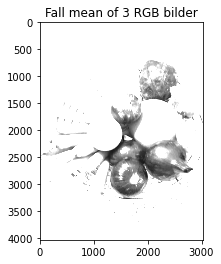

In [41]:
#mean of 3 RGB bilder
imagemean = fall.mean(axis=2) # row wise mean-- instead of 3, we have now 1
plt.imshow(imagemean,vmin=0,vmax=50,cmap='gray')
plt.title(label="Fall mean of 3 RGB bilder", fontsize=12)
plt.show()

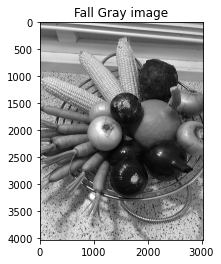

In [42]:
#GRB to gray
grayscaleima= rgb2gray(fall)# it will normalize the image, the value will be between 0 & 1
plt.imshow(grayscaleima, vmin=0, vmax=1,cmap='gray') 
plt.title(label="Fall Gray image", fontsize=12)
plt.show()

# Histogram with 265 bins by manual code Default

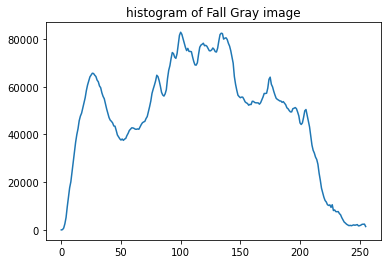

In [43]:
def make_default_histogram(image):
    histogram = np.zeros(256)
    shape = np.shape(image)  # we got it from the #mean of 3 RGB bilder
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(image[i,j])
            histogram[pixval] += 1
    return histogram
histogram = make_default_histogram(imagemean)
plt.title(label="histogram of Fall Gray image", fontsize=12)
plt.plot(histogram)
plt.show()

# Histogram with 265 bins by Python Matplot builtin

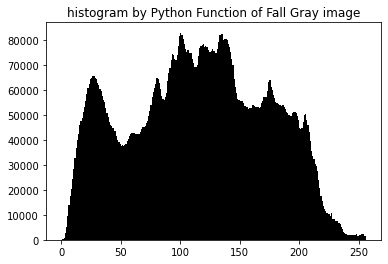

In [44]:
plt.hist(imagemean.ravel(), bins=256, range=[0,256], color='black'); 
plt.title(label="histogram by Python Function of Fall Gray image", fontsize=12)
plt.show()

# Histogram with 32 bins by manual code (Binned histogram)

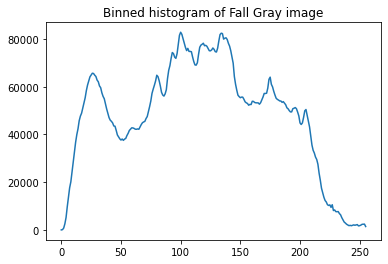

In [45]:
def generate_binned_histogram(image, bin_no=32, max_val =256):
    histogram = make_default_histogram(image)
    K = max_val
    b = bin_no
    histogram = np.zeros(b)
    shape = np.shape(image)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(image[i,j])
            histval = int(pixval*(b/K))
            histogram[histval] += 1
    return histogram
 
binned = generate_binned_histogram(imagemean)
plt.figure()  
plt.title(label="Binned histogram of Fall Gray image", fontsize=12)
plt.plot(histogram)
plt.show()

# IRELAND AKA AIRFIELD

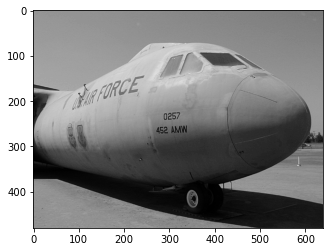

In [46]:
# low contrast image
#filename = 'airfield.tif'
filename = '../Images/airfield.tif'
ireland = io.imread(filename)
plt.imshow(ireland,cmap='gray')
plt.show()

# Histogram with 265 bins by manual code

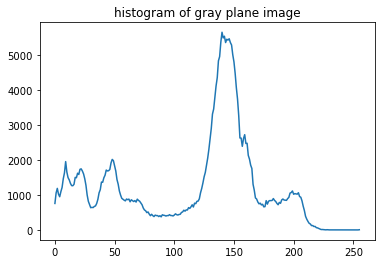

In [47]:
#Histogram by manual function
histogram = make_default_histogram(ireland)
plt.title(label="histogram of gray plane image", fontsize=12)
plt.plot(histogram)
plt.show()

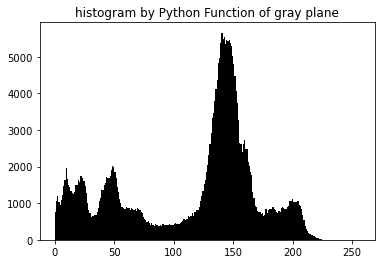

In [48]:
#Histogram by python built-in function
plt.hist(ireland.ravel(), bins=256, range=[0,256], color='black'); 
plt.title(label="histogram by Python Function of gray plane", fontsize=12)
plt.show()

# Cumulated histogram with 256 bins by manual code

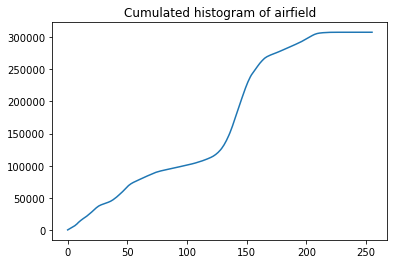

In [49]:
# Cumulated histogram
def generate_cumulative_histogram(image):
    histogram = make_default_histogram(image)
    cumhist = np.zeros(256)
    cumhist[0] = histogram[0]
    for i in range(255):
        cumhist[i+1] = cumhist[i] + histogram[i+1]
    return cumhist

cumhist = generate_cumulative_histogram(ireland)
plt.figure()   
plt.title(label="Cumulated histogram of airfield", fontsize=12)
plt.plot(cumhist)
plt.show()

# Histogram equalisation by manual code
- histogram equalisation works on the Cumulated histogram

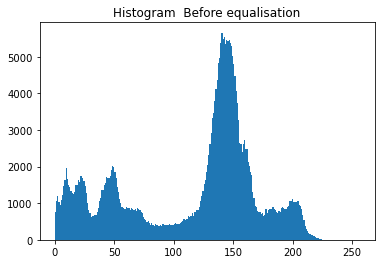

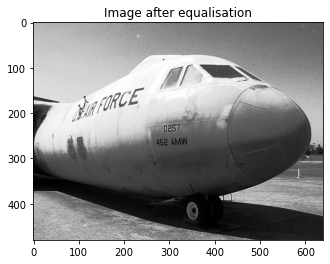

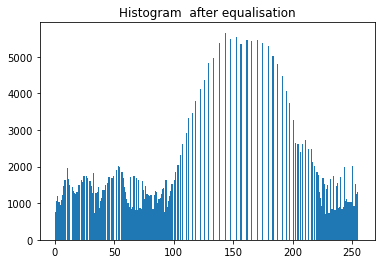

In [50]:
def generate_hist_equlisation(image):
    hist_equalise_img = image[:,:]*1
    K = 256
    cumhist= generate_cumulative_histogram(hist_equalise_img)
    shape = np.shape(hist_equalise_img)
    M = shape[0] #Row of image
    N = shape[1] # Col of image

    for i in range(shape[0]):#Row
        for j in range(shape[1]):#Col
            a = int(hist_equalise_img[i,j])
            b = cumhist[a]*(K-1)/(M*N)  # here, k is 256 
            hist_equalise_img[i,j] = b
    return hist_equalise_img
 
plt.hist(ireland.ravel(), bins =256, range =[0,256])
plt.title("Histogram  Before equalisation")
plt.show()

hist_equ =  generate_hist_equlisation(ireland)
plt.imshow(hist_equ , cmap='gray')
plt.title("Image after equalisation")
plt.show()

plt.hist(hist_equ.ravel(), bins =256, range =[0,256])
plt.title("Histogram  after equalisation")
plt.show()

# Histogram equalisation by Python

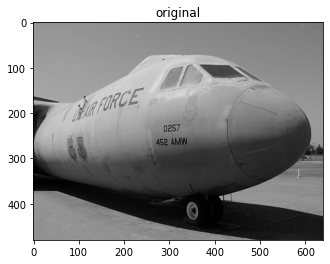

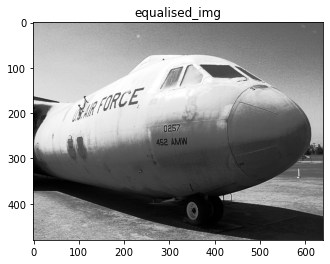

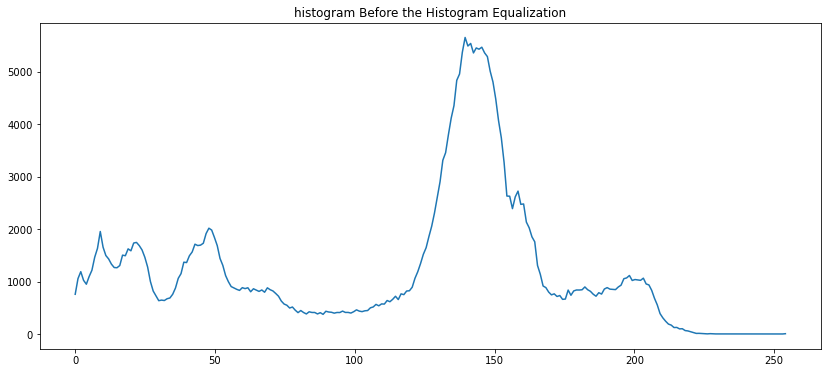

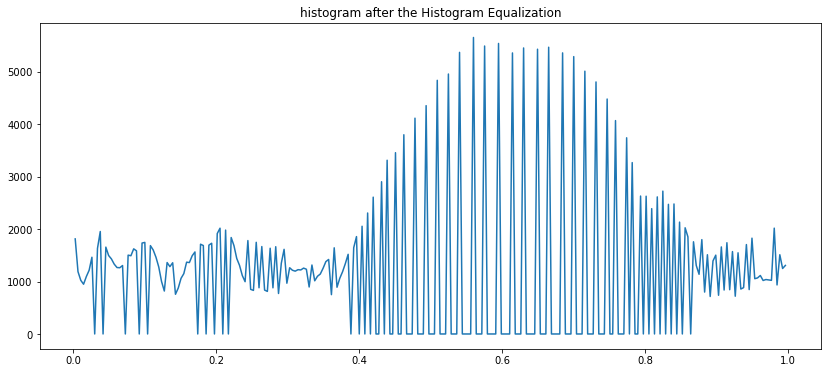

In [51]:
# Histogram equalisation by Python
filename = '../Images/airfield.tif'
ireland = io.imread(filename)


hist_equ =  exposure.equalize_hist(ireland)

show_image(ireland, label ="original", size=(8,4), cmap='gray')
show_image(hist_equ, label ="equalised_img", size=(8,4), cmap='gray')



#plotting the histogram BEFORE the Histogram Equalization
plt.subplots(1, 1,figsize=(14, 6))
plt.title("histogram Before the Histogram Equalization")
hist, bin_edges = np.histogram(ireland, bins=256)
plt.plot(bin_edges[:-1], hist)  # density=False would make counts
plt.show()


#plotting the histogram after the Histogram Equalization
plt.subplots(1, 1,figsize=(14, 6))
plt.title("histogram after the Histogram Equalization")
hist, bin_edges = np.histogram(hist_equ, bins=256)
plt.plot(bin_edges[:-1], hist)  # density=False would make counts
plt.show()


# Point operations
- increasing contrast with 50 % on FALL MEAN IMAGE

In [52]:
def contrast_adjust(image, percentage):
    new_image = image[:,:]*1.0
    amount = 1 + (percentage*1.0)/100
#     print("amoount", amoount)
    shape = np.shape(new_image)
    for i in range(shape[0]):
        for j in range(shape[1]):
            new_image[i,j] = int(new_image[i,j]*amount + 0.5)
            if new_image[i,j] > 255:
                new_image[i,j] = 255
    return new_image

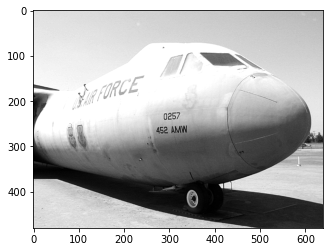

In [53]:
image50 = contrast_adjust(ireland, 50)
plt.figure()
plt.imshow(image50, cmap='gray')

# Point operations  WITH FALL M 
### increasing brighness by 10 

In [54]:
def brightness_adjust(image, percentage):
    new_image = image[:,:]*1.0
    shape = np.shape(new_image)
    for i in range(shape[0]):
        for j in range(shape[1]):
            new_image[i,j] = int(new_image[i,j]+10)
            if new_image[i,j] > 255:
                new_image[i,j] = 255
    return new_image  

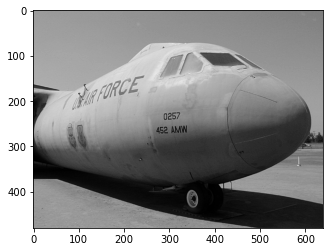

In [55]:
image51 = brightness_adjust(ireland, 10)
plt.figure()
plt.imshow(image51, cmap='gray')

# Inversion with  fall mean image

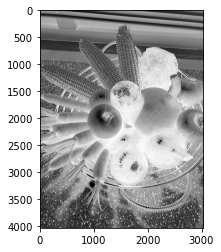

In [56]:
def get_invert_image(image):
    invert_image = image[:,:]
    shape = np.shape(invert_image)
    maxval = max(invert_image.flatten())
    for i in range(shape[0]):
        for j in range(shape[1]):
            invert_image[i,j] = int(-invert_image[i,j] + maxval)
    return invert_image

invert_image = get_invert_image(imagemean)            
plt.imshow(invert_image,cmap='gray') 
plt.show()

# automatic contrast adjustment Manual

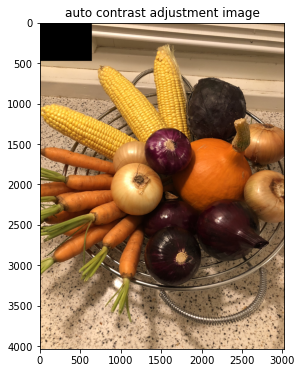

Text(0.5, 1.0, 'Histogram  after auto contrast adjustment')

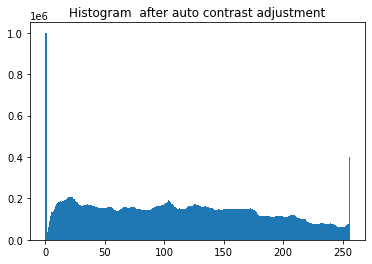

In [57]:
def automatic_contrast_adjustment(image): 
    image = image [:,:]*1
    ahigh = max(image.flatten())
    alow = min(image.flatten())
    amin = 0
    amax = 255
    for i in range(shape[0]):
        for j in range(shape[1]):
            image[i,j] = amin + (image[i,j]-alow)*(amax-amin)/(ahigh-alow)
        
    return image
  
    
#reading image
fall = get_image('../Images/fall.jpeg')
ans = automatic_contrast_adjustment(fall)
show_image(ans, label ="auto contrast adjustment image", size=(10,6), cmap='gray')
plt.hist(ans.ravel(), bins =256, range =[0,256])
plt.title("Histogram  after auto contrast adjustment")

# Automatic contrast adjustment by Python

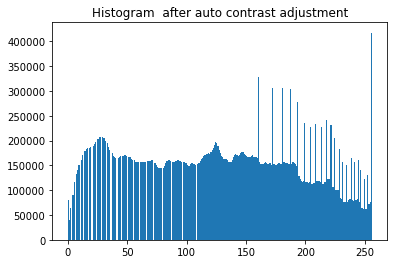

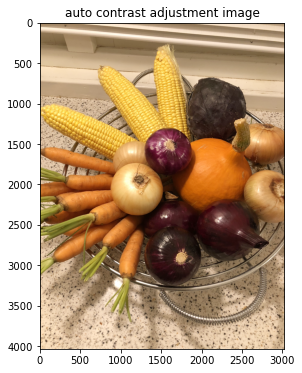

In [58]:
# Logarithmic--auto contrast adjustment
logarithmic_corrected = exposure.adjust_log(fall, gain=1)
plt.hist(logarithmic_corrected.ravel(), bins =256, range =[0,256])
plt.title("Histogram  after auto contrast adjustment")
# # display image
show_image(logarithmic_corrected, label ="auto contrast adjustment image", size=(10,6), cmap='gray')
